# Smooth Gowdy symmetric generalized Taub-NUT solutions by Beyer and Henig
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 19, 2022

Here we concentrate on the metric from equation 53

https://arxiv.org/abs/1106.2377

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [10]:
t,theta,rho1,rho2,dt,dtheta,drho1,drho2,R0 = symbols('t theta rho1 rho2 dt dtheta drho1 drho2 R0')

In [4]:
M = Function('M')(t,theta)
M

In [7]:
Q = Function('Q')(t,theta)
Q

In [5]:
u = Function('u')(t,theta)
u

In [11]:
variables = Matrix([t,theta,rho1,rho2])
variables

⎡t ⎤
⎢  ⎥
⎢θ ⎥
⎢  ⎥
⎢ρ₁⎥
⎢  ⎥
⎣ρ₂⎦

In [12]:
differentials = Matrix([dt,dtheta,drho1,drho2])
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢drho₁ ⎥
⎢      ⎥
⎣drho₂ ⎦

In [8]:
lineElement = expand(exp(M)*(-dt**2 + dtheta**2) + R0 * (sin(t)**2 * exp(u) * (drho1 + Q *drho2)**2 + sin(theta)**2 * exp(-u) * drho2**2))
lineElement

In [13]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  M(t, θ)                                                                                  
⎢-ℯ            0                   0                                        0               
⎢                                                                                           
⎢            M(t, θ)                                                                        
⎢    0      ℯ                      0                                        0               
⎢                                                                                           
⎢                             u(t, θ)    2                                 u(t, θ)    2     
⎢    0         0          R₀⋅ℯ       ⋅sin (t)                  R₀⋅Q(t, θ)⋅ℯ       ⋅sin (t)  
⎢                                                                                           
⎢                                 u(t, θ)    2         2        u(t, θ)    2          -u(t, 
⎣    0         0      R₀⋅Q(t, θ)⋅ℯ       ⋅sin (t)  R₀⋅Q (t, θ)⋅ℯ      

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡  M(t, θ)                                                                                  
⎢-ℯ            0                   0                                        0               
⎢                                                                                           
⎢            M(t, θ)                                                                        
⎢    0      ℯ                      0                                        0               
⎢                                                                                           
⎢                             u(t, θ)    2                                 u(t, θ)    2     
⎢    0         0          R₀⋅ℯ       ⋅sin (t)                  R₀⋅Q(t, θ)⋅ℯ       ⋅sin (t)  
⎢                                                                                           
⎢                                 u(t, θ)    2         2        u(t, θ)    2          -u(t, 
⎣    0         0      R₀⋅Q(t, θ)⋅ℯ       ⋅sin (t)  R₀⋅Q (t, θ)⋅ℯ      

In [16]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("t theta rho1 rho2")
t,theta,rho1,rho2 = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂            ∂                                                                            
⎢⎢──(M(t, θ))  ──(M(t, θ))                                                                  
⎢⎢∂t           ∂θ                                                                           
⎢⎢───────────  ───────────                                                                  
⎢⎢     2            2                                                                       
⎢⎢                                                                                          
⎢⎢∂            ∂                                                                            
⎢⎢──(M(t, θ))  ──(M(t, θ))                                                                  
⎢⎢∂θ           ∂t                                                                           
⎢⎢───────────  ───────────                                                                  
⎢⎢     2            2                                                 

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                        2              2                                   
⎢                                  2    ∂              ∂                          2         
⎢   2⋅u(t, θ)    2    ⎛∂          ⎞    ───(M(t, θ))   ───(M(t, θ))   ⎛∂          ⎞        ∂ 
⎢  ℯ         ⋅sin (t)⋅⎜──(Q(t, θ))⎟      2              2            ⎜──(u(t, θ))⎟        ──
⎢                     ⎝∂t         ⎠    ∂t             ∂θ             ⎝∂t         ⎠        ∂θ
⎢- ───────────────────────────────── - ──────────── + ──────────── - ────────────── + 1 + ──
⎢                   2                       2              2               2                
⎢              2⋅sin (θ)                                                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

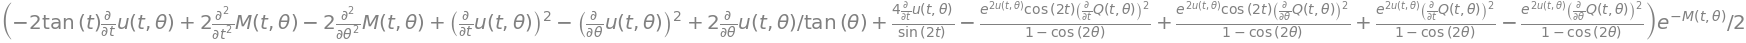

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                  2                                                        
⎢   2⋅u(t, θ)    2    ⎛∂          ⎞                                                         
⎢  ℯ         ⋅sin (t)⋅⎜──(Q(t, θ))⎟                                               2         
⎢                     ⎝∂t         ⎠               ∂                  ⎛∂          ⎞         ⎛
⎢- ───────────────────────────────── - 0.5⋅tan(t)⋅──(u(t, θ)) - 0.25⋅⎜──(u(t, θ))⎟  - 0.25⋅⎜
⎢                   2                             ∂t                 ⎝∂t         ⎠         ⎝
⎢              2⋅sin (θ)                                                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [23]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [24]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [25]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡                                        2              2                                   
⎢                                  2    ∂              ∂                          2         
⎢   2⋅u(t, θ)    2    ⎛∂          ⎞    ───(M(t, θ))   ───(M(t, θ))   ⎛∂          ⎞        ∂ 
⎢  ℯ         ⋅sin (t)⋅⎜──(Q(t, θ))⎟      2              2            ⎜──(u(t, θ))⎟        ──
⎢                     ⎝∂t         ⎠    ∂t             ∂θ             ⎝∂t         ⎠        ∂θ
⎢- ───────────────────────────────── - ──────────── + ──────────── - ────────────── + 1 + ──
⎢                   2                       2              2               2                
⎢              2⋅sin (θ)                                                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified